In [1]:
import sys
import os

# Go two levels up from docs/source/ to reach the project root
# sys.path.insert(0, os.path.abspath('../../'))

import ionerdss as ion
import subprocess
from IPython.display import display, Image

Homo 3mer

In [2]:
pdb_id = '5va4'
save_folder = '~/Documents/5va4_dir'

pdb_model = ion.PDBModel(pdb_id=pdb_id, save_dir=save_folder)

# set standard_output=True to see the determined interfaces
pdb_model.coarse_grain(distance_cutoff=0.35, 
                       residue_cutoff=3,
                       show_coarse_grained_structure=False, 
                       save_pymol_script=False, 
                       standard_output=True)

Successfully downloaded assembly file: /Users/sikao/Documents/5va4_dir/5va4-assembly1.cif.gz
Binding interfaces detected:
Chain A:
  Center of Mass (COM): (-29.37865447998047, -38.55076217651367, -0.7850199937820435)
  Interfaces: ['A-2', 'A-3']
  Interface Coordinates: 
    (-22.705501556396484, -29.3987979888916, 14.563600540161133)
    Interface Energy: -23.34
    (-29.779748916625977, -20.811498641967773, 16.340749740600586)
    Interface Energy: -23.34
Chain A-2:
  Center of Mass (COM): (0.7850199937820435, -29.37865447998047, 38.55076217651367)
  Interfaces: ['A', 'A-3']
  Interface Coordinates: 
    (-16.340749740600586, -29.77975082397461, 20.811498641967773)
    Interface Energy: -23.34
    (-14.563600540161133, -22.705501556396484, 29.3987979888916)
    Interface Energy: -23.34
Chain A-3:
  Center of Mass (COM): (-38.55076217651367, 0.7850199937820435, 29.37865447998047)
  Interfaces: ['A', 'A-2']
  Interface Coordinates: 
    (-29.398799896240234, -14.563600540161133, 22.705

In [3]:
pdb_model.regularize_homologous_chains(dist_threshold_intra=3.5, 
                                       dist_threshold_inter=3.5, 
                                       angle_threshold=25.0, 
                                       show_coarse_grained_structure=False, 
                                       save_pymol_script=True, 
                                       standard_output=False)

Homologous chains identified using sequence alignment:
{'A': 'A', 'A-2': 'A', 'A-3': 'A'}
Homologous chain groups identified:
[['A', 'A-2', 'A-3']]
Regularized coarse-grained structure saved to /Users/sikao/Documents/5va4_dir/regularized_coarse_grained_structure.cif.
PyMOL script saved to /Users/sikao/Documents/5va4_dir/visualize_regularized_coarse_grained.pml.
Model saved successfully to /Users/sikao/Documents/5va4_dir/5va4_model.json


PyMOL>load /Users/sikao/Documents/5va4_dir/regularized_coarse_grained_structure.cif, coarse_grained
 ExecutiveLoad-Detail: Detected mmCIF
 CmdLoad: "/Users/sikao/Documents/5va4_dir/regularized_coarse_grained_structure.cif" loaded as "coarse_grained".
PyMOL>hide everything
PyMOL>show spheres, name COM
PyMOL>show spheres, name INT
PyMOL>set sphere_scale, 1.0
 Setting: sphere_scale set to 1.00000.
PyMOL>color red, name COM
 Executive: Colored 3 atoms.
PyMOL>color blue, name INT
 Executive: Colored 6 atoms.
PyMOL>pseudoatom com_A, pos=[-29.379, -38.551, -0.785], color=red
 ObjMol: created com_A/PSDO/P/PSD`1 /PS1
PyMOL>pseudoatom int_A_1, pos=[-22.706, -29.399, 14.564], color=blue
 ObjMol: created int_A_1/PSDO/P/PSD`1 /PS1
PyMOL>distance line1, com_A, int_A_1
 Executive: object "line1" created.
PyMOL>set dash_width, 4, line1
 Setting: dash_width set to 4.00000 in object "line1".
PyMOL>set dash_gap, 0.5, line1
 Setting: dash_gap set to 0.50000 in object "line1".
PyMOL>pseudoatom int_A_2, pos

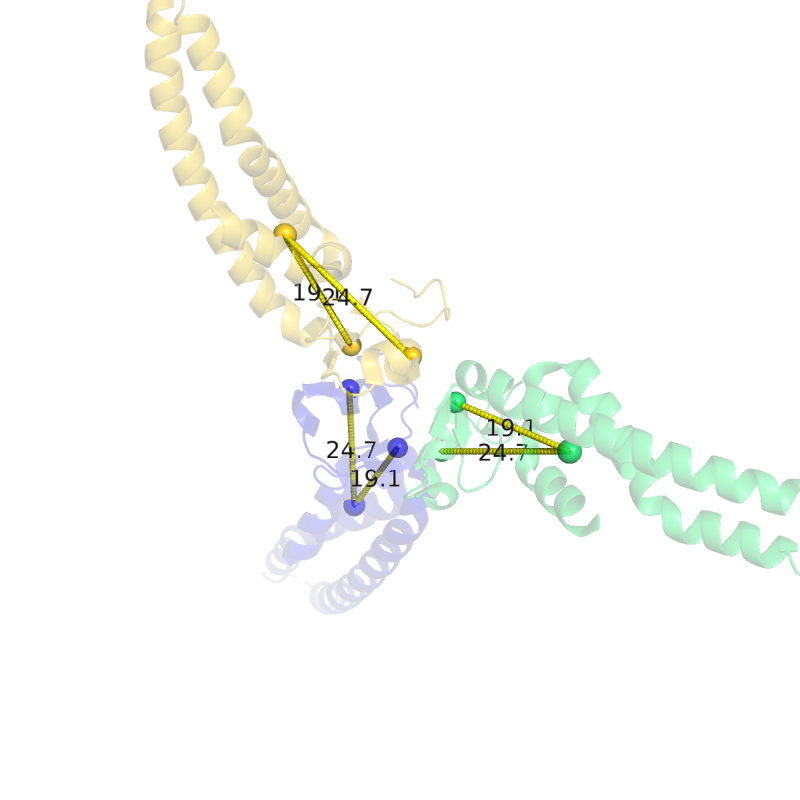

In [4]:
if save_folder.startswith('~'):
    abs_save_folder = os.path.expanduser(save_folder)
abs_save_folder = os.path.abspath(abs_save_folder)

subprocess.run(["pymol", "-cq", f"{abs_save_folder}/visualize_regularized_coarse_grained.pml"], check=True)
display(Image(filename=f"{abs_save_folder}/comparison_regularized.png"))